In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('titanic')

# Show first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.shape

(891, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [6]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [7]:
df.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]>

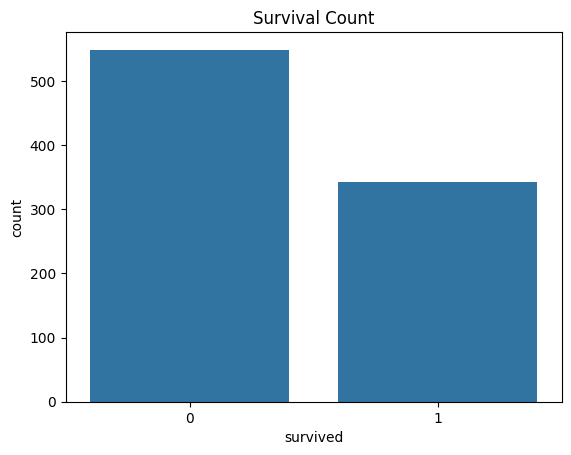

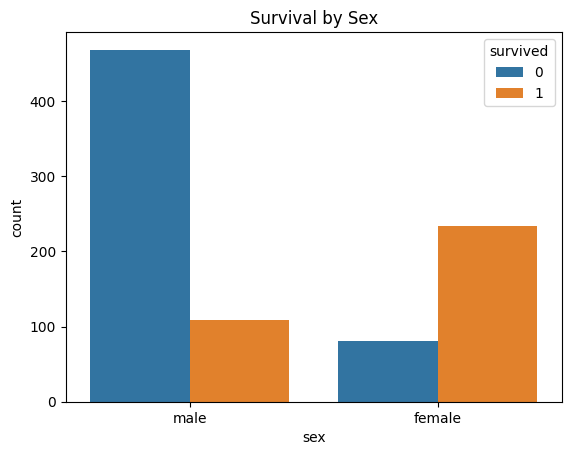

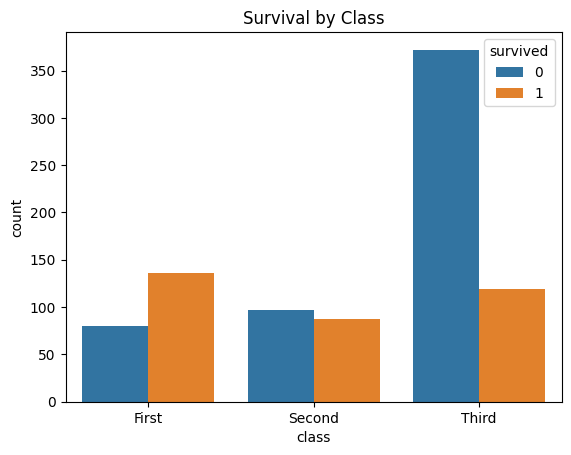

In [8]:
# Countplot for survival
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.show()

# Survival by sex
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Sex')
plt.show()

# Survival by class
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival by Class')
plt.show()


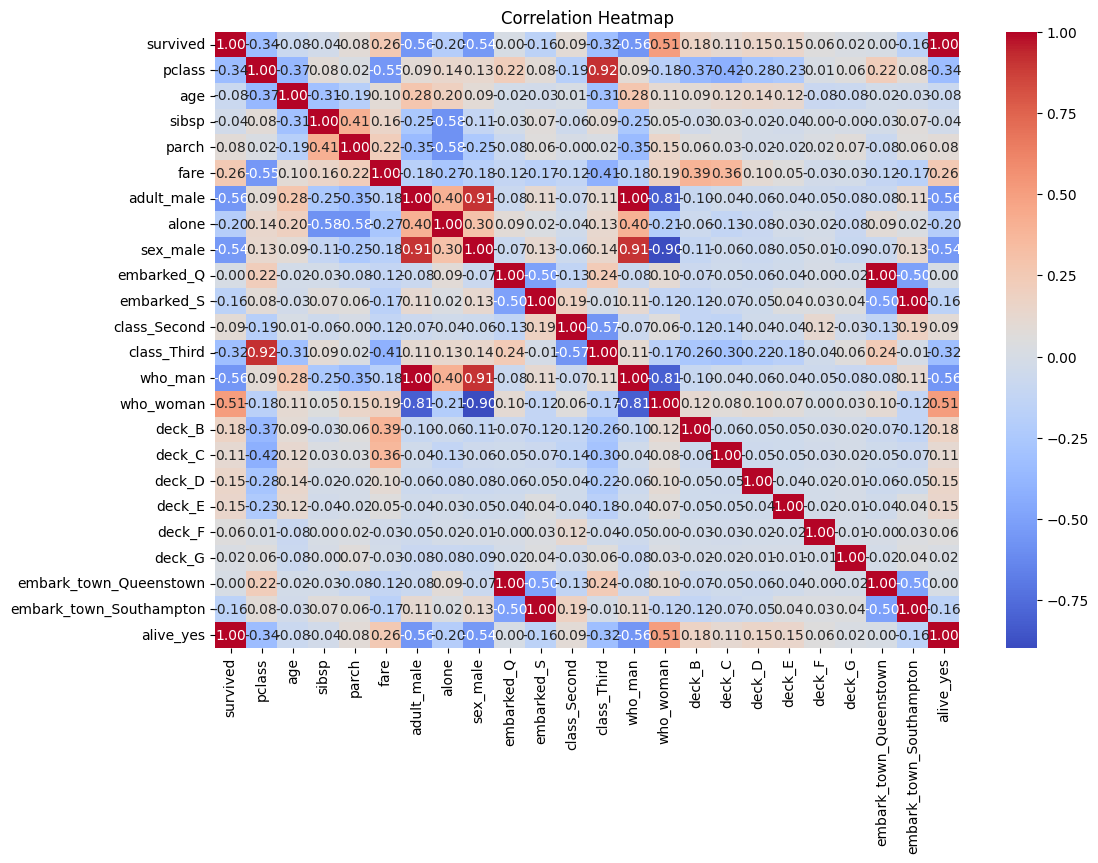

In [11]:
# Convert all categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Now generate the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Drop columns with too many nulls or irrelevant
df_cleaned = df.drop(columns=['deck', 'embark_town', 'alive'])

# Fill missing values
df_cleaned.loc[:, 'age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())
df_cleaned.loc[:, 'embarked'] = df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0])
# Save to CSV (for next day ML)
df_cleaned.to_csv('titanic_cleaned.csv', index=False)

In [14]:
import os
os.listdir()

['.config', 'titanic_cleaned.csv', 'sample_data']

In [15]:
from google.colab import files
files.download('titanic_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('titanic_cleaned.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True,False,True,True,False


In [19]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[91 14]
 [20 54]]


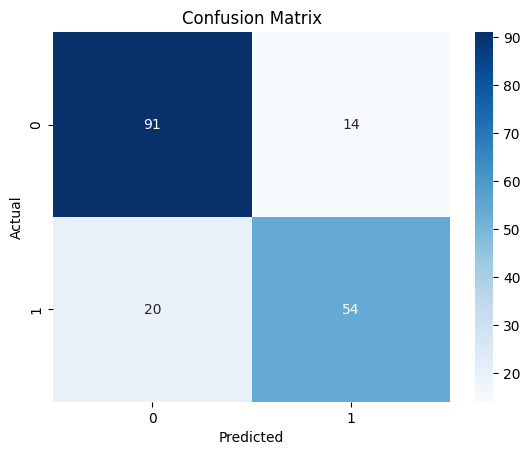

In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
manual_df = pd.DataFrame([manual_input])

In [26]:
print(X.columns.tolist())

['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man', 'who_woman']


In [27]:
manual_input = {
    'pclass': 2,
    'age': 28,
    'sibsp': 0,
    'parch': 0,
    'fare': 20,
    'adult_male': 1,
    'alone': 1,
    'sex_male': 1,
    'embarked_Q': 0,
    'embarked_S': 1,
    'class_Second': 0,
    'class_Third': 1,
    'who_man': 1,
    'who_woman': 0
}

In [35]:
manual_df = pd.DataFrame([manual_input])
prediction = model.predict(manual_df)[0]
print("Survived ✅" if prediction == 1 else "Did not survive ❌")
print("Prediction probability:", model.predict_proba(manual_df))


Did not survive ❌
Prediction probability: [[0.78193477 0.21806523]]
